<a href="https://colab.research.google.com/github/Keshavjha07/sentiment-Analysis-Stock-price/blob/main/Finvizz_Sentiment_BERT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 101 kB/s 
     |████████████████████████████████| 6.8 MB 37.1 MB/s 
     |████████████████████████████████| 981 kB 36.5 MB/s 
     |████████████████████████████████| 263 kB 48.2 MB/s 
     |████████████████████████████████| 1.9 MB 34.0 MB/s 
     |████████████████████████████████| 1.2 MB 40.5 MB/s 
     |████████████████████████████████| 468 kB 34.6 MB/s 
     |████████████████████████████████| 3.3 MB 48.8 MB/s 
     |████████████████████████████████| 895 kB 32.3 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.3-py3-none-any.whl size=25283131 sha256=8f298f594f1a31d54bbb17b7f26d2acb03a035d25c01a4a976ce762448085665
  Stored in directory: /root/.cache/pip/wheels/3c/ef/e1/7da805d8a5944e8a3ac0553831d832c00b1800b848939849cb
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=831c1240a6d2502478226a5c7cb23c041aa3d2133a277c5cf1959660770e42a0
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff

In [ ]:
!pip install yahoo-fin

     |████████████████████████████████| 81 kB 6.8 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6065 sha256=04119ea8a585a8eb04b3463a38e3177586826a850ef5432ce12add5891a10177
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k


In [ ]:
!pip install requests_html

     |████████████████████████████████| 83 kB 2.2 MB/s 
     |████████████████████████████████| 103 kB 43.1 MB/s 
     |████████████████████████████████| 138 kB 48.8 MB/s 
     |████████████████████████████████| 127 kB 54.5 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=eef664d20e0c653f0df85116a299f975a64af933cd06f15fdc011e9d9c2f6b78
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=3449a8f3c493690f9d77cfa4b9bfea02a3cce06e891428996ccac9fbc7438be9
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
from yahoo_fin import options

In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
data_train = pd.read_excel(r'C:\Users\Dell\Downloads\train.xlsx', dtype=str)
data_train.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [ ]:
data_test = pd.read_excel(r'C:\Users\Dell\Downloads\test.xlsx', dtype=str)
data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=data_train, 
                   text_column='Reviews', label_columns='Sentiment', 
                   val_df=data_test, 
                   maxlen=400, 
                   preprocess_mode='bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train[0].shape

(25000, 400)

In [ ]:
model = text.text_classifier(name='bert', train_data=(X_train, y_train), 
                             preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
learner = ktrain.get_learner(model=model, 
                             train_data=(X_train, y_train), 
                             val_data=(X_test, y_test), 
                             batch_size=6)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=1)

In [ ]:
learner

In [ ]:
predictor = ktrain.get_predictor(model=learner.model, preproc=preprocess)

In [ ]:
testing_data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
                'The film really sucked. I want my money back.',
                'The plot had too many holes.',
                'What a beautiful romantic comedy. 10/10 would see again!',
                ]

In [ ]:
predictor.predict(texts=testing_data)

['neg', 'pos', 'neg', 'pos']

In [ ]:
predictor.predict(texts=testing_data, return_proba=True)

array([[0.51861376, 0.4813862 ],
       [0.47512802, 0.524872  ],
       [0.58197236, 0.41802764],
       [0.48663762, 0.51336235]], dtype=float32)

In [ ]:
website_url = 'https://finviz.com/quote.ashx?t='
company_tikcers = ['AMD', 'AMZN', 'FB', 'GOOG']

In [ ]:
news_tables = {}

for ticker in company_tikcers:
  url = website_url + ticker

  req = Request(url=url, headers={'user-agent': 'my-scrape'})
  response = urlopen(req)
  html = BeautifulSoup(response, 'html')
  news_data = html.find(id='news-table')
  news_tables[ticker] = news_data

In [ ]:
parsed_data = []

for ticker, news_table in news_tables.items():
  for row in news_table.findAll('tr'):
    title = row.a.text
    date_data = row.td.text.split(' ')

    if len(date_data) == 1:
      time = date_data[0][0:7]
    else:
      date = datetime.datetime.strptime(date_data[0], '%b-%d-%y').strftime('%Y/%m/%d')
      time = date_data[1][0:7]

    parsed_data.append([ticker, date, time, title])

In [ ]:
dataset = pd.DataFrame(parsed_data, columns=["Company", "Date", "Time", "News Headline"])
dataset.to_csv('CompanyNewsHeadlines_WithoutSentiment.csv', index=False)
dataset.head()

,Company,Date,Time,News Headline
0,AMD,2021/09/17,08:17AM,Better Buy: AMD vs. Micron Technology
1,AMD,2021/09/17,07:00AM,Why I Like AMD's Plan to Address the Chip Shor...
2,AMD,2021/09/16,10:38AM,10 New Penny Stocks Redditors are Buying
3,AMD,2021/09/15,09:28PM,"Obscure Firms 1,219% Rise Shows Profit, Pain o..."
4,AMD,2021/09/15,05:45PM,Advanced Micro Devices (AMD) Stock Sinks As Ma...


In [ ]:
dataset['Sentiment'] = dataset['News Headline'].apply(lambda headline: predictor.predict(texts=headline))

In [ ]:
dataset.head()

,Company,Date,Time,News Headline,Sentiment
0,AMD,2021/09/17,08:17AM,Better Buy: AMD vs. Micron Technology,pos
1,AMD,2021/09/17,07:00AM,Why I Like AMD's Plan to Address the Chip Shor...,pos
2,AMD,2021/09/16,10:38AM,10 New Penny Stocks Redditors are Buying,neg
3,AMD,2021/09/15,09:28PM,"Obscure Firms 1,219% Rise Shows Profit, Pain o...",pos
4,AMD,2021/09/15,05:45PM,Advanced Micro Devices (AMD) Stock Sinks As Ma...,neg


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date).dt.date

In [ ]:
dataset.to_csv('CompanyNewsHeadlines.csv', index=False)

In [ ]:
max_min_date = dataset.groupby(['Company']).agg({'Date': [np.min,np.max]})
max_min_date

Date            
               amin        amax
Company                        
AMD      2021-08-20  2021-09-17
AMZN     2021-09-14  2021-09-17
FB       2021-09-09  2021-09-17
GOOG     2021-09-10  2021-09-17

In [ ]:
dataset['MaxDate'] = dataset.groupby('Company').Date.transform('max')
dataset['MinDate'] = dataset.groupby('Company').Date.transform('min')

dataset.head()

,Company,Date,Time,News Headline,Sentiment,MaxDate,MinDate
0,AMD,2021-09-17,08:17AM,Better Buy: AMD vs. Micron Technology,pos,2021-09-17,2021-08-20
1,AMD,2021-09-17,07:00AM,Why I Like AMD's Plan to Address the Chip Shor...,pos,2021-09-17,2021-08-20
2,AMD,2021-09-16,10:38AM,10 New Penny Stocks Redditors are Buying,neg,2021-09-17,2021-08-20
3,AMD,2021-09-15,09:28PM,"Obscure Firms 1,219% Rise Shows Profit, Pain o...",pos,2021-09-17,2021-08-20
4,AMD,2021-09-15,05:45PM,Advanced Micro Devices (AMD) Stock Sinks As Ma...,neg,2021-09-17,2021-08-20


In [ ]:
company_early_late_dates = {}

for index, row in dataset.iterrows():
  if row['Company'] in company_early_late_dates:
      company_early_late_dates[row['Company']]['early'] = row['MinDate']
      company_early_late_dates[row['Company']]['late'] = row['MaxDate']
  else:
    company_early_late_dates[row['Company']] = {'early': None, 'late': None}

company_early_late_dates

{'AMD': {'early': datetime.date(2021, 8, 20),
  'late': datetime.date(2021, 9, 17)},
 'AMZN': {'early': datetime.date(2021, 9, 14),
  'late': datetime.date(2021, 9, 17)},
 'FB': {'early': datetime.date(2021, 9, 9),
  'late': datetime.date(2021, 9, 17)},
 'GOOG': {'early': datetime.date(2021, 9, 10),
  'late': datetime.date(2021, 9, 17)}}

In [ ]:
for key, value in company_early_late_dates.items():
  print(key, '->', value)
  tmp_df = si.get_data(key, start_date=value['early'], end_date=value['late'])
  tmp_df['date'] = tmp_df.index
  tmp_df.to_csv(key + '_BERT.csv', index=False)

AMD -> {'early': datetime.date(2021, 8, 20), 'late': datetime.date(2021, 9, 17)}
AMZN -> {'early': datetime.date(2021, 9, 14), 'late': datetime.date(2021, 9, 17)}
FB -> {'early': datetime.date(2021, 9, 9), 'late': datetime.date(2021, 9, 17)}
GOOG -> {'early': datetime.date(2021, 9, 10), 'late': datetime.date(2021, 9, 17)}


In [ ]:
sentiment_result = {}
for value in dataset['Sentiment']:
  if value in sentiment_result:
    if value == 'neu':
      sentiment_result['neu'] += 1
    elif value == 'pos':
      sentiment_result['pos'] += 1
    elif value == 'neg':
      sentiment_result['neg'] += 1
  else:
    sentiment_result[value] = 1

sentiment_result

{'pos': 156, 'neg': 244}

In [ ]:
result_by_companies = {}
for index, row in dataset.iterrows():
  if row['Company'] in result_by_companies:
    if row['Sentiment'] == 'neu':
      result_by_companies[row['Company']]['neu'] +=1
    if row['Sentiment'] == 'pos':
      result_by_companies[row['Company']]['pos'] +=1
    if row['Sentiment'] == 'neg':
      result_by_companies[row['Company']]['neg'] +=1
  else:
    result_by_companies[row['Company']] = {'neg': 0, 'neu': 0, 'pos': 0}

result_by_companies

{'AMD': {'neg': 59, 'neu': 0, 'pos': 40},
 'AMZN': {'neg': 61, 'neu': 0, 'pos': 38},
 'FB': {'neg': 62, 'neu': 0, 'pos': 37},
 'GOOG': {'neg': 61, 'neu': 0, 'pos': 38}}

In [ ]:
dataframe_list = []
for key, value in result_by_companies.items():
  print(key, '->', value)
  dataframe_list.append([key, value['neg'], value['neu'], value['pos']])


dataset_company = pd.DataFrame(dataframe_list, columns=["Company", "Neg", "Neu", "Pos"])
dataset_company.head()

AMD -> {'neg': 59, 'neu': 0, 'pos': 40}
AMZN -> {'neg': 61, 'neu': 0, 'pos': 38}
FB -> {'neg': 62, 'neu': 0, 'pos': 37}
GOOG -> {'neg': 61, 'neu': 0, 'pos': 38}


,Company,Neg,Neu,Pos
0,AMD,59,0,40
1,AMZN,61,0,38
2,FB,62,0,37
3,GOOG,61,0,38


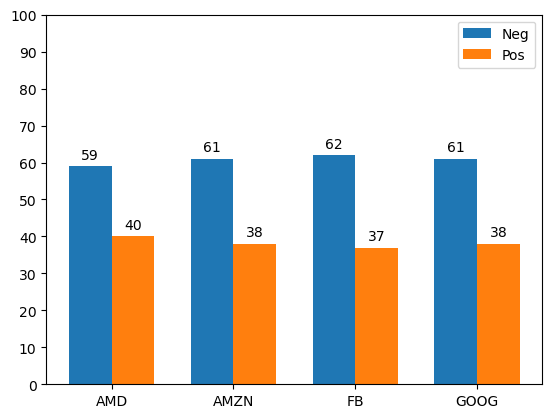

In [ ]:
index = np.arange(len(company_tikcers))
score_label = np.arange(0, 110, 10)

bar_width = 0.35

fig, ax = plt.subplots()
barNeg = ax.bar(index - bar_width/2, dataset_company['Neg'], bar_width, label='Neg')
barPos = ax.bar(index + bar_width/2, dataset_company['Pos'], bar_width, label='Pos')

ax.set_xticks(index)
ax.set_xticklabels(company_tikcers)

ax.set_yticks(score_label)
ax.set_yticklabels(score_label)


ax.legend()

def insert_data_labels(bars):
  for bar in bars:
    bar_height = bar.get_height()
    ax.annotate('{0:.0f}'.format(bar.get_height()),
                xy=(bar.get_x() + bar.get_width() / 2, bar_height),
                xytext=(0,3),
                textcoords='offset points',
                ha='center',
                va='bottom'
    )

insert_data_labels(barNeg)
insert_data_labels(barPos)

plt.show()


In [ ]:
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [ ]:
def visualization(positive, neutral, negative):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('Aggregate sentiment value of the economic news headlines')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

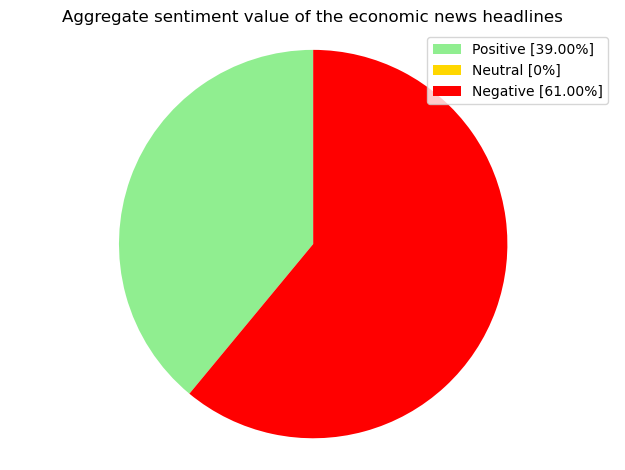

In [ ]:
# compile economic judgment focusing on the news of these companies
all_num = sentiment_result['pos'] + sentiment_result['neg']
pos_percent = percentage(part=sentiment_result['pos'], whole=all_num)
neg_percent = percentage(part=sentiment_result['neg'], whole=all_num)

visualization(positive=pos_percent,neutral=0, negative=neg_percent)

In [ ]:
amd_stock = pd.read_csv(r"C:\Users\DELL\Downloads\AMD_BERT.csv")
amzn_stock = pd.read_csv(r"C:\Users\DELL\Downloads\AMZN_BERT.csv")
fb_stock = pd.read_csv(r"C:\Users\DELL\Downloads\FB_BERT.csv")
goog_stock = pd.read_csv("C:\Users\DELL\Downloads\GOOG_BERT.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/AMD_BERT.csv'

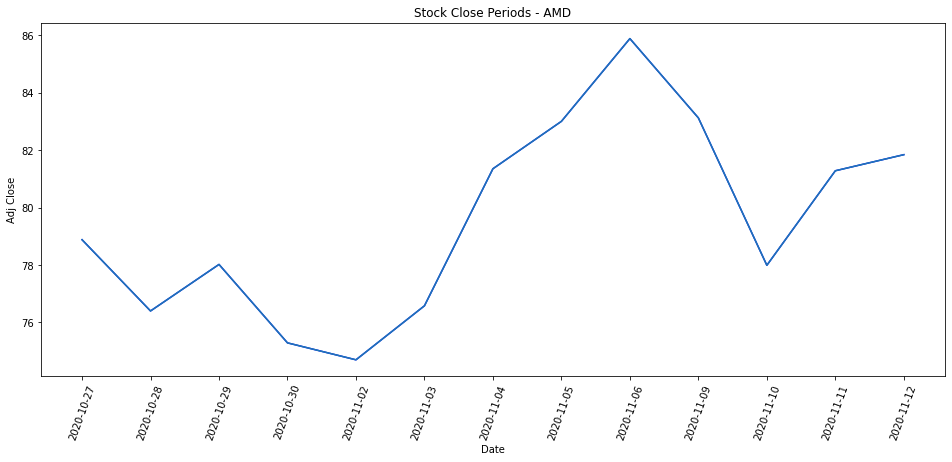

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - AMD')
plt.plot(amd_stock['adjclose'], label='AMD', color = 'blue')
x = amd_stock['date']
y = amd_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
amd_stock.corr()

,open,high,low,close,adjclose,volume
open,1.000,0.953,0.899,0.811,0.811,0.263
high,0.953,1.000,0.962,0.910,0.910,0.133
low,0.899,0.962,1.000,0.971,0.971,-0.054
close,0.811,0.910,0.971,1.000,1.000,-0.089
adjclose,0.811,0.910,0.971,1.000,1.000,-0.089
volume,0.263,0.133,-0.054,-0.089,-0.089,1.000


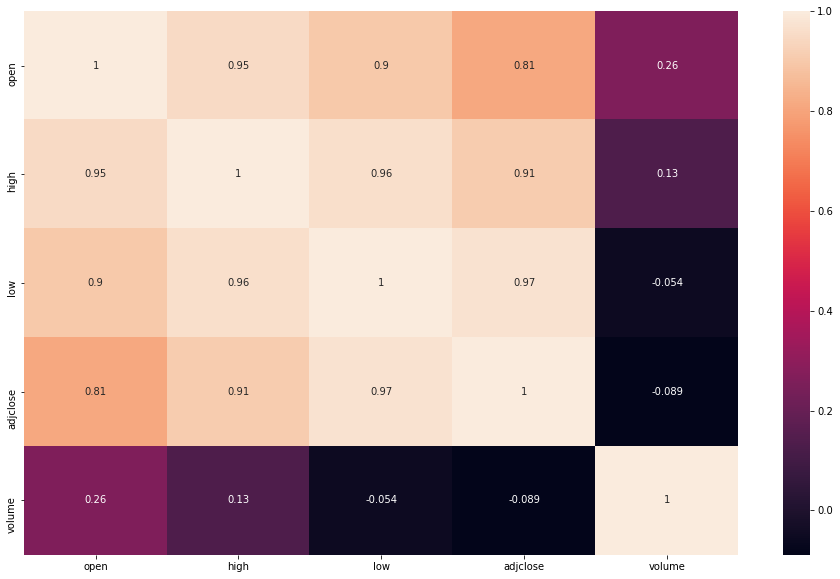

In [ ]:
# amd stock correlation analysis

plt.figure(figsize=(16, 10))
sns.heatmap(amd_stock[['open', 'high', 'low', 'adjclose', 'volume']].corr(), annot=True)
plt.show()

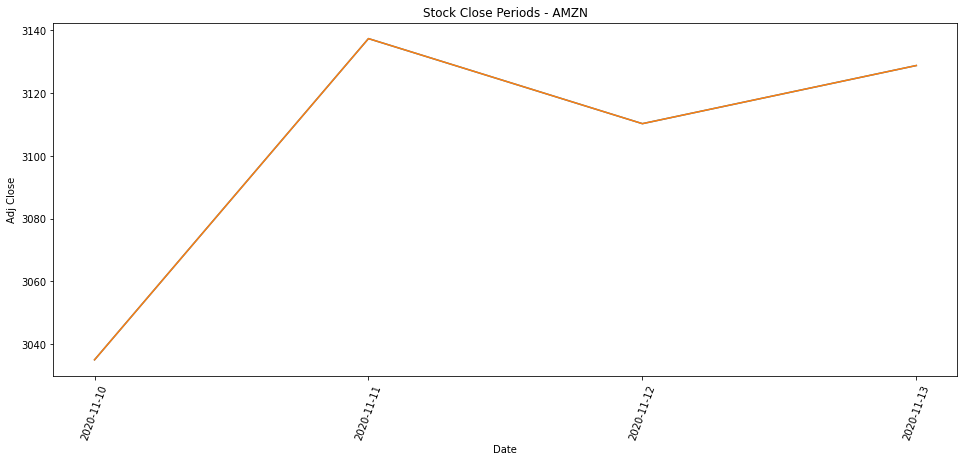

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - AMZN')
plt.plot(amzn_stock['adjclose'])
x = amzn_stock['date']
y = amzn_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

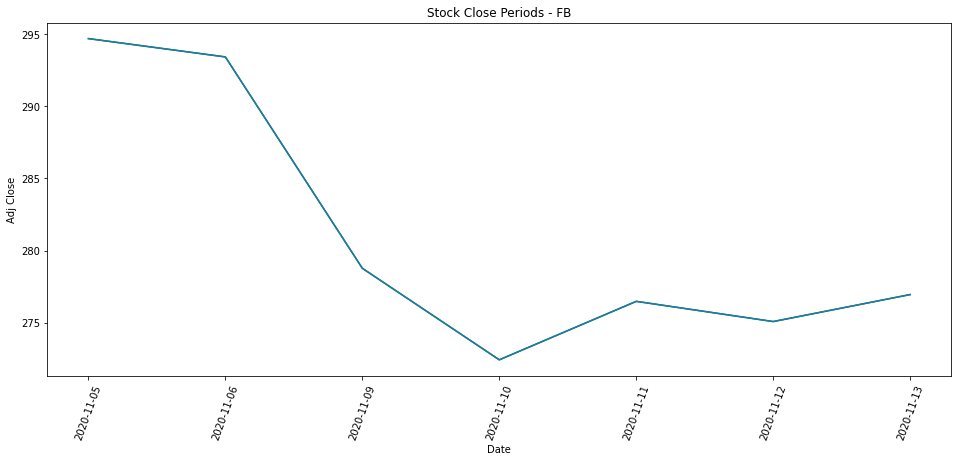

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - FB')
plt.plot(fb_stock['adjclose'], label='FB', color = 'green')
x = fb_stock['date']
y = fb_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()

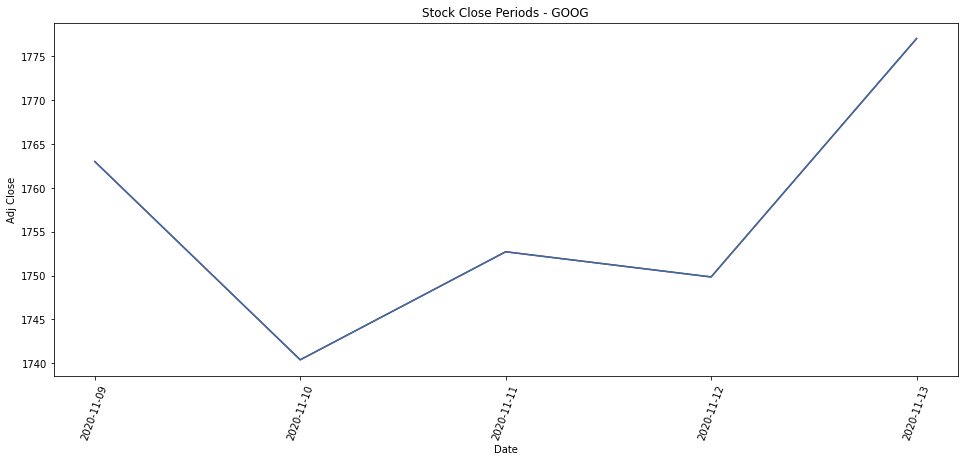

In [ ]:
plt.figure(figsize=(16.2, 6.5))
plt.title('Stock Close Periods - GOOG')
plt.plot(goog_stock['adjclose'], label='GOOG', color = 'red')
x = goog_stock['date']
y = goog_stock['adjclose']
plt.plot(x, y)
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.show()